In [98]:
# !pip3 install tensorflow_text>=2.0.0rc0
# !pip install wordcloud

### Importing the packages

In [ ]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text
import ast
# from nltk.corpus import germanet

In [ ]:
nltk.download('stopwords')
german_stop_words = stopwords.words('german')
nltk.download("germanet")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Error loading germanet: Package 'germanet' not found in
[nltk_data]     index


False

### Data Loading

In [ ]:
modules = pd.read_csv("Learning Catalogue.csv")

In [ ]:
modules

,Title,Description
0,Digital Detox,Die Digitalisierung hat unser gesamtes Leben v...
1,Infoflut bewältigen - Zeit gewinnen,"Mails, Tweets und Posts, dazu Branchennews und..."
2,Stressmanagement,Wann fühlen Sie sich in Ihrem beruflichen und ...
3,Kreatives Zeitmanagement - Aufgaben typgerecht...,"Zeitmanagement ist in der heutigen, komplexen,..."
4,Resilienz,Manche Menschen gehen gestärkt aus Krisen herv...
...,...,...
115,Feedback geben,In diesem e-Learning lernen Sie Feedback als F...
116,Neu in der Führungsrolle,"In dieser Lerneinheit lernen Sie, wie Sie zwis..."
117,Aufgaben delegieren,In dieser Lerneinheit lernen Sie delegierbare ...
118,Führen nach Reifegrad,Sie lernen in dieser Lerneinheit das Modell „F...


In [ ]:
skills = pd.read_excel("Sample_Skills.xlsx")

In [ ]:
skills = skills.dropna()

In [ ]:
skills

,Skill
0,Unternehmenspolitik anwenden
1,Unternehmenspolitik beobachten
2,in Bezug auf die politische Landschaft auf akt...
3,Unternehmensstandards festlegen
4,Urheberrecht
...,...
285,Datenqualitätsverfahren anwenden
286,Qualität der Rohstoffe überprüfen
287,Fertigungsdaten für die Qualitätskontrolle auf...
288,Destillationsprozesse überwachen


In [ ]:
modules["Title"].value_counts()>1

Aufgaben delegieren                              True
Digital Detox                                   False
Reklamation - Eine Reklameaktion                False
Verhandlungstraining: Erfolgreich verhandeln    False
Erste Hilfe Online-Kurs                         False
                                                ...  
Konfliktmanagement                              False
Teammeetings verbessern                         False
Teamperformance erhöhen                         False
Virtuelle Moderation                            False
Mitarbeitergespräche führen                     False
Name: Title, Length: 119, dtype: bool

In [ ]:
len(list(modules["Title"].unique()))

119

In [ ]:
len(list(skills["Skill"].unique()))

286

### WordCloud

In [ ]:
description_words = ''
for des in modules.Description:
     
    # typecaste each val to string
    des = str(des)
 
    # split the value
    tokens = des.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    description_words += " ".join(tokens)+" "

In [ ]:
description_words

'die digitalisierung hat unser gesamtes leben völlig neu geprägt. sie hat viele positive seiten, aber auch negative folgen wie stress und konzentrationsstörungen. in diesem elearning analysieren sie die ursachen der digitalen belastung und erhalten tipps, wie sie mit den folgen der dauerhaften erreichbarkeit umgehen können. außerdem werden sie mehrere möglichkeiten kennenlernen und ausprobieren, mit denen sie zurück in die entspannung finden können. außerdem können sie mit unserem digital-detox-notfallkoffer unmittelbar digitale belastung erkennen und bekommen werkzeuge an die hand, mit denen sie direkt etwas dagegen tun können. lernziele - sie (er)kennen die ursachen der digitalen belastung wie multitasking, störenden unterbrechungen und sofortige belohnung und können hiermit bewusst umgehen. - sie analysieren ihre nutzung von digitalen medien und endgeräten. - sie entwickeln strategien für einen bewussteren umgang mit digitalen medien und endgeräten und nutzen digital-detox-strategie

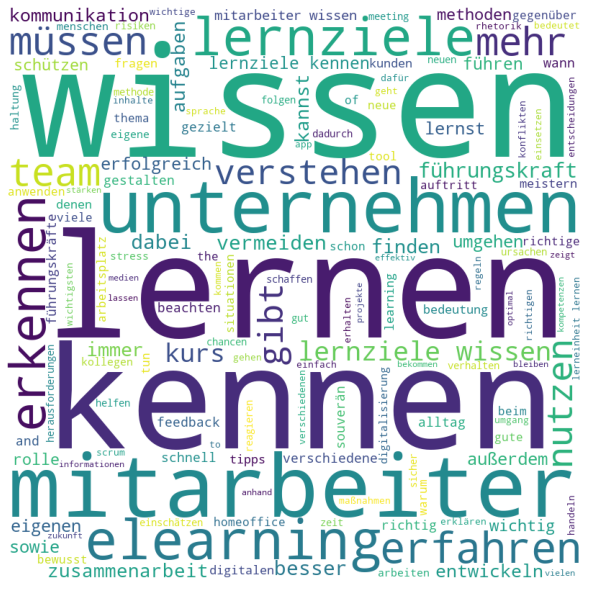

In [ ]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = german_stop_words,
                min_font_size = 10).generate(description_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [ ]:
print(german_stop_words)

['aber', 'alle', 'allem', 'allen', 'aller', 'alles', 'als', 'also', 'am', 'an', 'ander', 'andere', 'anderem', 'anderen', 'anderer', 'anderes', 'anderm', 'andern', 'anderr', 'anders', 'auch', 'auf', 'aus', 'bei', 'bin', 'bis', 'bist', 'da', 'damit', 'dann', 'der', 'den', 'des', 'dem', 'die', 'das', 'dass', 'daß', 'derselbe', 'derselben', 'denselben', 'desselben', 'demselben', 'dieselbe', 'dieselben', 'dasselbe', 'dazu', 'dein', 'deine', 'deinem', 'deinen', 'deiner', 'deines', 'denn', 'derer', 'dessen', 'dich', 'dir', 'du', 'dies', 'diese', 'diesem', 'diesen', 'dieser', 'dieses', 'doch', 'dort', 'durch', 'ein', 'eine', 'einem', 'einen', 'einer', 'eines', 'einig', 'einige', 'einigem', 'einigen', 'einiger', 'einiges', 'einmal', 'er', 'ihn', 'ihm', 'es', 'etwas', 'euer', 'eure', 'eurem', 'euren', 'eurer', 'eures', 'für', 'gegen', 'gewesen', 'hab', 'habe', 'haben', 'hat', 'hatte', 'hatten', 'hier', 'hin', 'hinter', 'ich', 'mich', 'mir', 'ihr', 'ihre', 'ihrem', 'ihren', 'ihrer', 'ihres', 'euc

In [ ]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder-multilingual/3")

### Prprocessing the data

In [ ]:
modules["Description_Processed"] = modules["Description"].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in german_stop_words]))
punct =  ['-',',','.','%','$','#','@','*','&','^','!','_',';']
modules["Description_Processed"] = modules["Description_Processed"].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in punct]))
skills["Skill_Processed"] = skills["Skill"].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in german_stop_words]))

In [ ]:
len(modules["Description_Processed"][0].split())

91

In [ ]:
len(modules["Description"][0])

1217

## Generate the embeddings using Universal Sentence Encoder Embeddings for german words

In [ ]:
def create_embeddings(description):
  li_embed = []
  for word in description.split():
    embed_word = embed(word)
    li_embed.append(embed_word)
  return li_embed

In [ ]:
modules["embeddings"] = modules.apply(lambda row: create_embeddings(row["Description_Processed"]), axis=1)

In [105]:
# modules

In [ ]:
modules["embeddings"][0][0]

<tf.Tensor: shape=(1, 512), dtype=float32, numpy=
array([[ 0.12047363, -0.01083451,  0.0271473 ,  0.03168485, -0.03656849,
        -0.04601309, -0.00745219, -0.04529138,  0.02775022, -0.01238645,
         0.04692018,  0.0157438 , -0.09107784, -0.00991184, -0.05686664,
         0.02860408, -0.08408306,  0.05146715,  0.01647506,  0.04787986,
         0.04053024,  0.03861975,  0.05157771, -0.09085092,  0.02385191,
         0.0305933 , -0.01154617,  0.00119397,  0.01625532, -0.00412293,
        -0.0948982 ,  0.06681355,  0.05107125, -0.0445979 ,  0.02750094,
        -0.02742186, -0.00593274, -0.05059007, -0.03159656, -0.0352791 ,
        -0.00536068,  0.04149161,  0.05540719, -0.01983929, -0.03987546,
        -0.03919947, -0.04114914,  0.03340711, -0.0428822 , -0.05058184,
        -0.01169802,  0.02912444, -0.04144664, -0.05166715,  0.04789411,
        -0.1184805 , -0.03677968,  0.06880811, -0.00786221, -0.02864514,
         0.00565461,  0.01252762, -0.04147635,  0.0408475 , -0.03790553,
 

### Embedding skills

In [ ]:
skills["embeddings"] = skills.apply(lambda row: create_embeddings(row["Skill_Processed"]), axis=1)

In [ ]:
len(skills["embeddings"][0])

2

# Word Based model ⛹




In [ ]:
for index, desc_embeedings in enumerate(modules["embeddings"]):

  onedesc_all_skill = []
  for skill_embedding in skills["embeddings"]:
    sim_desc_skill = np.inner(desc_embeedings, skill_embedding)
    a_in = np.empty((sim_desc_skill.shape[0], ))
    for idx, elem in enumerate(sim_desc_skill):
      a_in[idx,] = max(elem.flatten())
    onedesc_all_skill.append(list(a_in))

  # print(onedesc_all_skill)

  no_words_threshold_skill = []
  for e in onedesc_all_skill:
    # print(np.where(np.array(e)>0.4)[0].shape[0])
    no_words_threshold_skill.append(np.where(np.array(e)>0.4)[0].shape[0])

  print(len(no_words_threshold_skill))
  # print(no_words_threshold_skill)
  print(np.argsort(no_words_threshold_skill)[-5:][::-1])

  no_words_threshold_skill[8]
  print(modules["Title"][index])
  print(modules["Description"][index])
  print([skills["Skill"][i] for i in np.argsort(no_words_threshold_skill)[-5:][::-1]])

289
[105 147 119 166   8]
Digital Detox
Die Digitalisierung hat unser gesamtes Leben völlig neu geprägt. Sie hat viele positive Seiten, aber auch negative Folgen wie Stress und Konzentrationsstörungen. In diesem eLearning analysieren Sie die Ursachen der digitalen Belastung und erhalten Tipps, wie Sie mit den Folgen der dauerhaften Erreichbarkeit umgehen können. Außerdem werden Sie mehrere Möglichkeiten kennenlernen und ausprobieren, mit denen Sie zurück in die Entspannung finden können. Außerdem können Sie mit unserem Digital-Detox-Notfallkoffer unmittelbar digitale Belastung erkennen und bekommen Werkzeuge an die Hand, mit denen Sie direkt etwas dagegen tun können.

Lernziele
- Sie (er)kennen die Ursachen der digitalen Belastung wie Multitasking, störenden Unterbrechungen und sofortige Belohnung und können hiermit bewusst umgehen.
- Sie analysieren Ihre Nutzung von digitalen Medien und Endgeräten.
- Sie entwickeln Strategien für einen bewussteren Umgang mit digitalen Medien und Endge

# Word based Model 2 - After extending more common words in our dataset

In [65]:
print(wordcloud.words_)
more_common_words = list(wordcloud.words_.keys())[:20]
print(more_common_words)

{'wissen': 1.0, 'lernen': 0.8846153846153846, 'kennen': 0.8461538461538461, 'mitarbeiter': 0.7211538461538461, 'unternehmen': 0.6057692307692307, 'elearning': 0.40384615384615385, 'lernziele': 0.38461538461538464, 'erkennen': 0.34615384615384615, 'erfahren': 0.34615384615384615, 'müssen': 0.28846153846153844, 'mehr': 0.28846153846153844, 'team': 0.28846153846153844, 'nutzen': 0.2403846153846154, 'verstehen': 0.2403846153846154, 'gibt': 0.2403846153846154, 'lernziele wissen': 0.22115384615384615, 'kurs': 0.20192307692307693, 'führungskraft': 0.20192307692307693, 'besser': 0.19230769230769232, 'dabei': 0.19230769230769232, 'vermeiden': 0.19230769230769232, 'finden': 0.18269230769230768, 'immer': 0.18269230769230768, 'aufgaben': 0.17307692307692307, 'zusammenarbeit': 0.17307692307692307, 'kannst': 0.17307692307692307, 'entwickeln': 0.16346153846153846, 'kommunikation': 0.16346153846153846, 'umgehen': 0.15384615384615385, 'außerdem': 0.15384615384615385, 'eigenen': 0.15384615384615385, 'er

In [66]:
stop_words_extended = german_stop_words.copy()

In [67]:
stop_words_extended.extend(more_common_words)

In [68]:
stop_words_extended

['aber',
 'alle',
 'allem',
 'allen',
 'aller',
 'alles',
 'als',
 'also',
 'am',
 'an',
 'ander',
 'andere',
 'anderem',
 'anderen',
 'anderer',
 'anderes',
 'anderm',
 'andern',
 'anderr',
 'anders',
 'auch',
 'auf',
 'aus',
 'bei',
 'bin',
 'bis',
 'bist',
 'da',
 'damit',
 'dann',
 'der',
 'den',
 'des',
 'dem',
 'die',
 'das',
 'dass',
 'daß',
 'derselbe',
 'derselben',
 'denselben',
 'desselben',
 'demselben',
 'dieselbe',
 'dieselben',
 'dasselbe',
 'dazu',
 'dein',
 'deine',
 'deinem',
 'deinen',
 'deiner',
 'deines',
 'denn',
 'derer',
 'dessen',
 'dich',
 'dir',
 'du',
 'dies',
 'diese',
 'diesem',
 'diesen',
 'dieser',
 'dieses',
 'doch',
 'dort',
 'durch',
 'ein',
 'eine',
 'einem',
 'einen',
 'einer',
 'eines',
 'einig',
 'einige',
 'einigem',
 'einigen',
 'einiger',
 'einiges',
 'einmal',
 'er',
 'ihn',
 'ihm',
 'es',
 'etwas',
 'euer',
 'eure',
 'eurem',
 'euren',
 'eurer',
 'eures',
 'für',
 'gegen',
 'gewesen',
 'hab',
 'habe',
 'haben',
 'hat',
 'hatte',
 'hatten',
 '

In [69]:
print(len(german_stop_words))
print(len(stop_words_extended))

232
252


In [ ]:
modules["Description_Processed_extended"] = modules["Description"].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words_extended]))
punct =  ['-',',','.','%','$','#','@','*','&','^','!','_',';']
modules["Description_Processed_extended"] = modules["Description_Processed"].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in punct]))
skills["Skill_Processed_extended"] = skills["Skill"].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words_extended]))

In [ ]:
modules["embeddings_extended"] = modules.apply(lambda row: create_embeddings(row["Description_Processed_extended"]), axis=1)


In [45]:
skills["embeddings_extended"] = skills.apply(lambda row: create_embeddings(row["Skill_Processed_extended"]), axis=1)

In [46]:
## saving the data with embeddings
modules.to_csv("modules_with_embeddings.csv")
skills.to_csv("skills_with_embeddings.csv")

In [ ]:
for index, desc_embeedings in enumerate(modules["embeddings_extended"]):

  onedesc_all_skill = []
  for skill_embedding in skills["embeddings_extended"]:
    sim_desc_skill = np.inner(desc_embeedings, skill_embedding)
    a_in = np.empty((sim_desc_skill.shape[0], ))
    for idx, elem in enumerate(sim_desc_skill):
      a_in[idx,] = max(elem.flatten())
    onedesc_all_skill.append(list(a_in))

  # print(onedesc_all_skill)

  no_words_threshold_skill = []
  for e in onedesc_all_skill:
    # print(np.where(np.array(e)>0.4)[0].shape[0])
    no_words_threshold_skill.append(np.where(np.array(e)>0.4)[0].shape[0])

  print(len(no_words_threshold_skill))
  # print(no_words_threshold_skill)
  print(np.argsort(no_words_threshold_skill)[-5:][::-1])

  no_words_threshold_skill[8]
  print(modules["Title"][index])
  print(modules["Description"][index])
  print([skills["Skill"][i] for i in np.argsort(no_words_threshold_skill)[-5:][::-1]])

289
[147 105 119 166   8]
Digital Detox
Die Digitalisierung hat unser gesamtes Leben völlig neu geprägt. Sie hat viele positive Seiten, aber auch negative Folgen wie Stress und Konzentrationsstörungen. In diesem eLearning analysieren Sie die Ursachen der digitalen Belastung und erhalten Tipps, wie Sie mit den Folgen der dauerhaften Erreichbarkeit umgehen können. Außerdem werden Sie mehrere Möglichkeiten kennenlernen und ausprobieren, mit denen Sie zurück in die Entspannung finden können. Außerdem können Sie mit unserem Digital-Detox-Notfallkoffer unmittelbar digitale Belastung erkennen und bekommen Werkzeuge an die Hand, mit denen Sie direkt etwas dagegen tun können.

Lernziele
- Sie (er)kennen die Ursachen der digitalen Belastung wie Multitasking, störenden Unterbrechungen und sofortige Belohnung und können hiermit bewusst umgehen.
- Sie analysieren Ihre Nutzung von digitalen Medien und Endgeräten.
- Sie entwickeln Strategien für einen bewussteren Umgang mit digitalen Medien und Endge

## Prediction - Test out the model on new description!!

In [90]:
def predictor1(description):
  stopwordstextfile = open("german_stop_words.txt", "r")
  german_stop_words_ = stopwordstextfile.read()
  german_stop_words_ = ast.literal_eval(german_stop_words_)
  description = ' '.join([word for word in description.split() if word.lower() not in german_stop_words_])
  desc_embeddings = embed(description) 
  onedesc_all_skill = []
  for skill_embedding in skills["embeddings"]:
    sim_desc_skill = np.inner(desc_embeddings, skill_embedding)
    a_in = np.empty((sim_desc_skill.shape[0], ))
    for idx, elem in enumerate(sim_desc_skill):
      a_in[idx,] = max(elem.flatten())
    onedesc_all_skill.append(list(a_in))

  # print(onedesc_all_skill)

  no_words_threshold_skill = []
  for e in onedesc_all_skill:
    # print(np.where(np.array(e)>0.4)[0].shape[0])
    no_words_threshold_skill.append(np.where(np.array(e)>0.4)[0].shape[0])

  print(len(no_words_threshold_skill))
  # print(no_words_threshold_skill)
  print("Indices which skills assigned", np.argsort(no_words_threshold_skill)[-5:][::-1])

  no_words_threshold_skill[8]
  print("Skills assigned", [skills["Skill"][i] for i in np.argsort(no_words_threshold_skill)[-5:][::-1]])
  

  return [skills["Skill"][i] for i in np.argsort(no_words_threshold_skill)[-5:][::-1]]
def predictor2(description):
  stopwordstextfile = open("stop_words_extended.txt", "r")
  german_stop_words_ = stopwordstextfile.read()
  german_stop_words_ = ast.literal_eval(german_stop_words_)
  description = ' '.join([word for word in description.split() if word.lower() not in german_stop_words_])
  desc_embeddings = embed(description) 
  onedesc_all_skill = []
  for skill_embedding in skills["embeddings_extended"]:
    sim_desc_skill = np.inner(desc_embeddings, skill_embedding)
    a_in = np.empty((sim_desc_skill.shape[0], ))
    for idx, elem in enumerate(sim_desc_skill):
      a_in[idx,] = max(elem.flatten())
    onedesc_all_skill.append(list(a_in))

  # print(onedesc_all_skill)

  no_words_threshold_skill = []
  for e in onedesc_all_skill:
    # print(np.where(np.array(e)>0.4)[0].shape[0])
    no_words_threshold_skill.append(np.where(np.array(e)>0.4)[0].shape[0])

  # print(len(no_words_threshold_skill))
  # print(no_words_threshold_skill)
  print("Indices which skills assigned", np.argsort(no_words_threshold_skill)[-5:][::-1])

  no_words_threshold_skill[8]
  print("Skills assigned", [skills["Skill"][i] for i in np.argsort(no_words_threshold_skill)[-5:][::-1]])
  

  return [skills["Skill"][i] for i in np.argsort(no_words_threshold_skill)[-5:][::-1]]


## Enter description and test on either predictor1 or predictor2

In [106]:
description = input("Enter description....")

Enter description....In schwierigen Führungssituationen wird von Ihren Führungskräften nicht nur soziale Kompetenz erwartet, sondern auch eine für das Unternehmen juristisch korrekte Vorgehensweise. Arbeitsrechtliches Fachwissen ist daher für jede Führungskraft in Ihrem Unternehmen unverzichtbar, um in den Beschäftigungsverhältnissen mit Ihren Mitarbeitern immer rechtssichere Entscheidungen zu treffen und Mitarbeiter nachvollziehbar zu führen.  Lernziele - Sie erhalten grundlegende rechtliche Informationen, um Aufhebungsverträge wirksam abschließen zu können und wissen, welche Formvorschriften und Aufklärungs- und Hinweispflichten Sie im Zusammenhang mit Aufhebungsverträgen beachten müssen. - Sie wissen, welche Zeugnisarten es gibt und wann ein Anspruch auf Zeugniserstellung besteht und Sie wissen, was bei der Zeugniserstellung bezüglich Form, Aufbau und vor allem Inhalt zu beachten ist. - Sie kennen die rechtlichen Vorgaben zur täglichen Höchstarbeitszeit, wissen was Sie bezüglich Ruh

In [107]:
predictor1(description)

289
Indices which skills assigned [288 143  91  92  93]
Skills assigned ['Destillationsprozesse überwachen', 'Kundeninteressen schützen', 'aktuelle Daten interpretieren', 'Data-Mining durchführen', 'Massendaten analysieren']


['Destillationsprozesse überwachen',
 'Kundeninteressen schützen',
 'aktuelle Daten interpretieren',
 'Data-Mining durchführen',
 'Massendaten analysieren']

In [108]:
predictor2(description)

Indices which skills assigned [288 143  91  92  93]
Skills assigned ['Destillationsprozesse überwachen', 'Kundeninteressen schützen', 'aktuelle Daten interpretieren', 'Data-Mining durchführen', 'Massendaten analysieren']


['Destillationsprozesse überwachen',
 'Kundeninteressen schützen',
 'aktuelle Daten interpretieren',
 'Data-Mining durchführen',
 'Massendaten analysieren']

## Saving some files

In [78]:
## saving the extended stops words and also reading
textfile = open("stop_words_extended.txt", "w")
textfile.write(str(stop_words_extended))

textfile = open("stop_words_extended.txt", "r")
data = textfile.read()
print(type(ast.literal_eval(data)))

<class 'list'>


In [93]:
## saving the stops words and also reading
textfile = open("german_stop_words.txt", "w")
textfile.write(str(german_stop_words))

textfile = open("german_stop_words.txt", "r")
data = textfile.read()
print(type(ast.literal_eval(data)))

<class 'list'>


In [ ]:
from google.colab import files

In [94]:
## Download file loaclly if working on colab
files.download('stop_words_extended.txt')
files.download('german_stop_words.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Trash

In [ ]:
# a = np.inner(modules["embeddings"][0], skills["embeddings"][0])
# max(np.inner(modules["embeddings"][0], skills["embeddings"][0])[0].flatten())

# a_in = np.empty((a.shape[0], ))
# for idx, elem in enumerate(a):
#   # print(elem)
#   # print(max(elem.flatten()))
#   a_in[idx,] = max(elem.flatten())


# print(a_in)


# no_words_threshold_skill = []
# for e in onedesc_all_skill:
#   # print(np.where(np.array(e)>0.4)[0].shape[0])
#   no_words_threshold_skill.append(np.where(np.array(e)>0.4)[0].shape[0])

# print(len(no_words_threshold_skill))
# print(no_words_threshold_skill)
# print(np.argsort(no_words_threshold_skill)[-5:][::-1])

# no_words_threshold_skill[8]
# print([skills["Skill"][i] for i in np.argsort(no_words_threshold_skill)[-5:][::-1]])

# sim_score_new = -np.inf
# dict_ = {}
# for word in modules["Description_Processed"][0].split():
#   # print(word)
#   li = []
#   for skill in skills["Skill_Processed"]:
#     # print(skill)
#     sim_score_old = sim_score_new
#     for skill_word in skill.split():
#       sim_score_new = np.inner(embed(word), embed(skill_word))[0][0]
#       final_sim_score = max(sim_score_old, sim_score_new)
      
#       # sim_score = max(model.wv.similarity(skill_word, word), sim_score)
#     # print(f"Similarity score between {word} and {skill} is {final_sim_score}")
#     li.append(final_sim_score)
#   dict_[word] = li
#   print(word)
#   print(dict_[word])
#   # break
# print(dict_)
# np.argmax(test[0], axis=0)
# test[0].flatten()
# test[0].flatten().argsort()[-5:][::-1]
# skills.iloc[81,:]
# modules["Description_Processed"][0]
# modules["Title"][0]

In [ ]:
# # !wget https://cloud.devmount.de/d2bc5672c523b086/german.model
# # !wget https://int-emb-word2vec-de-wiki.s3.eu-central-1.amazonaws.com/vectors.txt
# # !wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.de.300.bin.gz
# !gzip -d cc.de.300.bin.gz

In [ ]:
# model = gensim.models.KeyedVectors.load_word2vec_format("german.model",binary=True)
# model.save()
# model.wv.similarity('mann', 'frau')
# len(list(model.wv.vocab))
# for word in modules["Description_Processed"][0].split():
#   print(word)
#   for skill in skills["Skill_Processed"]:
#     print(skill)
#     sim_score = -np.inf
#     for skill_word in skill.split():
#       sim_score = max(model.wv.similarity(skill_word, word), sim_score)
#     print(f"Similarity score between {word} and {skill} is {sim_score}")